# Foundations of data-driven health science

## Day 1: The anatomy of a computer and data

* Summarize how the main components of a computer relate to, and constrain, the act of "computing".
  * See [What is a computer](What_is_computer.ipynb)-notebook
* Describe the basic organisation of a file system, and navigate it using commands in a "terminal".
  * See [this notebook and associated exercises](E01-File_FileSystem_Bash.ipynb)
  * Learn commands in notebook, but _be sure to practice them in a terminal_!
* Contrast _textual_ and _binary_ files in terms of their contents and find information in both using tools that can be automated.
  * __Slides needed!__
  * Contrast: 

* data, talk about
    * philosophy of data (mje)
    * information; storage of information in bits and bytes = data
    * relate practical 'implementation' of data to persistent (HD) and non-persistent (RAM) media

* data types (use `type`-command in python)
    * numbers: ints and floats
        * too much detail? short (16-bit) vs. long (32-/64-int) ints; single vs. double precision
    * characters: just that (ASCII, unicode, ...)
    * strings: an ordered sequence of characters
        * has a length (`len`)
    * lists: an ordered sequence of arbitrary data types

In [ ]:
2

In [ ]:
type(2)

In [ ]:
3.0

In [ ]:
type(3.0)

In [ ]:
2/3.0

In [ ]:
type('a')

In [ ]:
len('a')

In [ ]:
len('abc')

### Example exercise (data8.org, Lecture 4)

## Day 2: The anatomy and building blocks of a program

* Contrast local and non-local computing resources and file systems, and formulate use cases for both.
* Use _variables_ in a programming language (python) and perform simple operations (manipulations) on the information (data) they contain.

* Use of for loops and control flow

### Function for calculating mean of list of numbers

In [ ]:
def my_mean(my_list):
    

## Day 3: Programming as a means to gain insight into data

* Write a program to extract, collate and preprocess "raw" data for further processing (statistics, visualisation, _etc._).

### Final product

Luck (2009): Impaired response selection in schizophrenia...

* long format dataset (csv-file)
    * patient/control (20/group) median RT x condition (all data good)
    * filenames (e.g.): 0001_ABC_20170101.log (possibly with a few typos?)

|Group|Cond|Median|Subjid|Accuracy|
|:---:|:---:|---|---|---|
|Patient/Control|Freq/Rare|{float}|{int}|{float}|
|...|...|...|...|...|

### Data format/structure

In [1]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

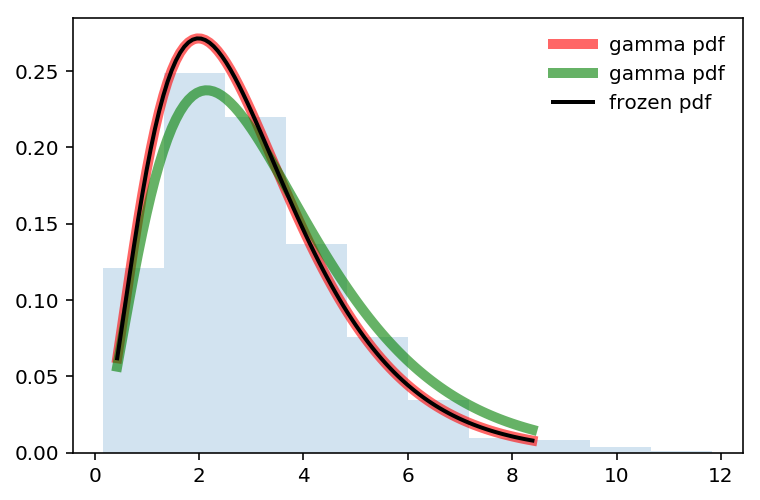

In [2]:
fig, ax = plt.subplots(1, 1)

# Calculate a few first moments:

a, a_loc, a_scale = 2.99, 0.5, 1
b, b_loc, b_scale = 2.79, 0, 1.2
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')

# Display the probability density function (``pdf``):

x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.plot(x, gamma.pdf(x, b, b_loc, b_scale),
       'g-', lw=5, alpha=0.6, label='gamma pdf')

# Alternatively, the distribution object can be called (as a function)
# to fix the shape, location and scale parameters. This returns a "frozen"
# RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen ``pdf``:

rv = gamma(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of ``cdf`` and ``ppf``:

vals = gamma.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], gamma.cdf(vals, a))
# True

# Generate random numbers:

r = gamma.rvs(a, size=1000)

# And compare the histogram:

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
def generate_RT_values(group='Control', trials=1000, rareprob=0.2):
    a, a_loc, a_scale = 2.99, 0.5, 1
    b, b_loc, b_scale = 2.79, 0, 1.2
    # r = gamma.rvs(a, size=trials)
    RTs = []
    return RTs

In [ ]:
patients = ['0004_SDF', '0015_GSC']
controls = ['0006_SDG', '0010_KGE']

In [ ]:
# 0004_SDF_20170101.log
# RARECAT=digit
# Time   SMTH   STIM=a
# Time   SMTH   RESP=1  (correct)
# Time   SMTH   STIM=j
# Time   SMTH   RESP=1  (correct)
# Time   SMTH   STIM=r
# Time   SMTH   RESP=2  (incorrect)
# Time   SMTH   STIM=4
# Time   SMTH   RESP=2  (correct)



### Skills needed/Tasks performed

In [ ]:
# from ddhs_helpers import find_file_matching_wildcard
import glob
import os

def find_file_matching_wildcard(wildcard, path='.'):
    allfiles = glob.glob(os.path.join(path, wildcard))
    if len(allfiles) == 0:
        raise ValueError('No files found matching: ...')
    elif len(allfiles) > 1:
        raise ValueError('More than one file found matching: ...')
    return allfiles[0]    

In [ ]:
%pwd

In [ ]:
find_file_matching_wildcard('course*', path='..')